*EAS 595 - Fundamentals of Artificial Intelligence*
# **Homework 3** - Convolutional Neural Networks

*Mounting G-drive to access data*

In [1]:

from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


*Importing required libraries*

In [2]:

import pickle
import numpy as np

import cv2

import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K

from sklearn.metrics import multilabel_confusion_matrix

import matplotlib.pyplot as plt


Using TensorFlow backend.


*Change the following variable to point to the USPS .pickle file*

In [0]:

class data_specs:
  pickle_location = '/content/gdrive/My Drive/AI Colab/usps_data.pickle'


*Extracting feature values and labels from the MNIST dataset*

In [4]:

img_row, img_col = 28, 28

(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

print("MNIST training data shape: "+str(mnist_x_train.shape))
print("MNIST training label shape: "+str(mnist_y_train.shape))
print("MNIST testing data shape: "+str(mnist_x_test.shape))
print("MNIST testing label shape: "+str(mnist_y_test.shape))


MNIST training data shape: (60000, 28, 28)
MNIST training label shape: (60000,)
MNIST testing data shape: (10000, 28, 28)
MNIST testing label shape: (10000,)


*Samples from MNIST training data*

Figure(432x288)


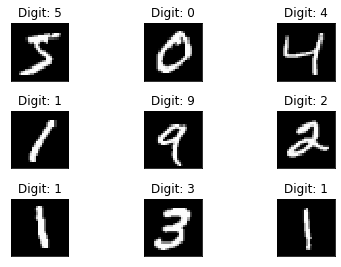

In [5]:

mnist_fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(mnist_x_train[i], cmap= 'gray', interpolation= 'none')
  plt.title('Digit: {}'.format(mnist_y_train[i]))
  plt.xticks([])
  plt.yticks([])

print(mnist_fig)


*Extracting feature values and labels from the USPS dataset*

In [6]:

(usps_x_train, usps_y_train), (usps_x_test, usps_y_test) = pickle.load(open(data_specs.pickle_location, 'rb'))

print("USPS training data shape: "+str(usps_x_train.shape))
print("USPS training label shape: "+str(usps_y_train.shape))
print("USPS testing data shape: "+str(usps_x_test.shape))
print("USPS testing label shape: "+str(usps_y_test.shape))


USPS training data shape: (19999,)
USPS training label shape: (19999,)
USPS testing data shape: (1500,)
USPS testing label shape: (1500,)


*Pre-processing image data (i.e.) resize images to fixed size 28x28*

In [7]:

resized_usps_x_train = []
for each_img in usps_x_train:
  resized_usps_x_train.append(cv2.resize(each_img, dsize= (img_row, img_col)))

usps_x_train = np.asarray(resized_usps_x_train)

resized_usps_x_test = []
for each_img in usps_x_test:
  resized_usps_x_test.append(cv2.resize(each_img, dsize= (img_row, img_col)))

usps_x_test = np.asarray(resized_usps_x_test)

print("Resized USPS training data shape: "+str(usps_x_train.shape))
print("Resized USPS testing data shape: "+str(usps_x_test.shape))


Resized USPS training data shape: (19999, 28, 28)
Resized USPS testing data shape: (1500, 28, 28)


*Samples from USPS training data*

Figure(432x288)


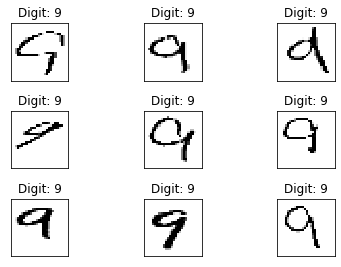

In [8]:

usps_fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(usps_x_train[i], cmap= 'gray', interpolation= 'none')
  plt.title('Digit: {}'.format(usps_y_train[i]))
  plt.xticks([])
  plt.yticks([])

print(usps_fig)


*Reshaping training & testing data of MNIST & USPS data according to channel*

In [9]:

if(K.image_data_format() == 'channels_first'):
  mnist_x_train = mnist_x_train.reshape(mnist_x_train.shape[0], 1, img_row, img_col)
  mnist_x_test = mnist_x_test.reshape(mnist_x_test.shape[0], 1, img_row, img_col)

  usps_x_train = usps_x_train.reshape(usps_x_train.shape[0], 1, img_row, img_col)
  usps_x_test = usps_x_test.reshape(usps_x_test.shape[0], 1, img_row, img_col)

  input_shape = (1, img_row, img_row)

else:
  mnist_x_train = mnist_x_train.reshape(mnist_x_train.shape[0], img_row, img_col, 1)
  mnist_x_test = mnist_x_test.reshape(mnist_x_test.shape[0], img_row, img_col, 1)

  usps_x_train = usps_x_train.reshape(usps_x_train.shape[0], img_row, img_col, 1)
  usps_x_test = usps_x_test.reshape(usps_x_test.shape[0], img_row, img_col, 1)

  input_shape = (img_row, img_row, 1)

mnist_x_train = mnist_x_train.astype('float32')
mnist_x_test = mnist_x_test.astype('float32')

mnist_x_train /= 255
mnist_x_test /= 255

usps_x_train = usps_x_train.astype('float32')
usps_x_test = usps_x_test.astype('float32')

usps_x_train /= 255
usps_x_test /= 255

print("Reshaped MNIST training data shape: "+str(mnist_x_train.shape))
print("Reshaped MNIST testing data shape: "+str(mnist_x_test.shape))
print("Reshaped USPS training data shape: "+str(usps_x_train.shape))
print("Reshaped USPS testing data shape: "+str(usps_x_test.shape))


Reshaped MNIST training data shape: (60000, 28, 28, 1)
Reshaped MNIST testing data shape: (10000, 28, 28, 1)
Reshaped USPS training data shape: (19999, 28, 28, 1)
Reshaped USPS testing data shape: (1500, 28, 28, 1)


*Categorizing training & testing labels of MNIST & USPS data*

In [10]:

mnist_y_train = to_categorical(mnist_y_train, 10)
mnist_y_test = to_categorical(mnist_y_test, 10)

usps_y_train = to_categorical(usps_y_train, 10)
usps_y_test = to_categorical(usps_y_test, 10)

print("Categorized MNIST training label shape: "+str(mnist_y_train.shape))
print("Categorized MNIST testing label shape: "+str(mnist_y_test.shape))
print("Categorized USPS training label shape: "+str(usps_y_train.shape))
print("Categorized USPS testing label shape: "+str(usps_y_test.shape))


Categorized MNIST training label shape: (60000, 10)
Categorized MNIST testing label shape: (10000, 10)
Categorized USPS training label shape: (19999, 10)
Categorized USPS testing label shape: (1500, 10)


*Creating a combined dataset to training Model C (combined_trained_model)*

In [11]:

combined_x_train = np.concatenate((mnist_x_train, usps_x_train))
combined_y_train = np.concatenate((mnist_y_train, usps_y_train))

combined_x_test = np.concatenate((mnist_x_test, usps_x_test))
combined_y_test = np.concatenate((mnist_y_test, usps_y_test))

print("Combined training data shape: "+str(combined_x_train.shape))
print("Combined training label shape: "+str(combined_y_train.shape))
print("Combined testing data shape: "+str(combined_x_test.shape))
print("combined testing label shape: "+str(combined_y_test.shape))


Combined training data shape: (79999, 28, 28, 1)
Combined training label shape: (79999, 10)
Combined testing data shape: (11500, 28, 28, 1)
combined testing label shape: (11500, 10)


*Initializing a class for CNN*

In [0]:

class CNN:
  def __init__(self, no_layers):
    self.model = keras.models.Sequential()
    self.model.add(Conv2D(32, kernel_size= (3, 3), activation= 'relu', input_shape= input_shape))
    self.model.add(MaxPooling2D(pool_size=(2, 2)))
    self.model.add(Flatten())

    for each_layer in range(no_layers):
      self.model.add(Dense(128, activation='relu'))
    
    self.model.add(Dense(10, activation = 'softmax'))

    self.model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.SGD(), metrics = ['accuracy'])

  def fit(self, x, y, batch_size, epochs, verbose, validation_data):
    self.model.fit(x, y, batch_size = batch_size, epochs = epochs, verbose = verbose, validation_data = validation_data)

  def evaluate_model(self, x, y, verbose):
    return self.model.evaluate(x, y, verbose = verbose)

  def predict(self, x, verbose):
    return self.model.predict(x, verbose = verbose)

  def summary(self):
    self.model.summary()


*Change the following variables to alter the hyper-parameters for the CNN*

In [0]:

batch_size = [64, 128, 256]
epoch = [15, 30, 60]


*The following model is trained with MNIST data*

In [14]:

# Change the next line to create CNN with multiple layers
mnist_trained_model = CNN(no_layers= 1)

for each_batch_size, each_epoch in [(batch_size[i], epoch[j]) for i in range(len(batch_size)) for j in range(len(epoch))]:
  mnist_fit_data = mnist_trained_model.fit(x= mnist_x_train, 
                                           y= mnist_y_train, 
                                           batch_size= each_batch_size, 
                                           epochs= each_epoch, 
                                           verbose= 0, 
                                           validation_data= (mnist_x_test, mnist_y_test))

  mnist_prediction = mnist_trained_model.predict(x= mnist_x_test,
                                                 verbose= 0)

  mnist_score = mnist_trained_model.evaluate_model(x= mnist_x_test,
                                            y= mnist_y_test,
                                            verbose= 0)
  
  print("********************************************************************************")
  print("When batch size is "+str(each_batch_size)+" and iterating for "+str(each_epoch))
  print("Loss : "+str(mnist_score[0]))
  print("Accuracy : "+str(mnist_score[1]))

  temp_1 = 1
  for each_digit in multilabel_confusion_matrix(np.argmax(mnist_y_test, axis=1), np.argmax(mnist_prediction, axis=1)):
    print("\nConfusion matrix for digit: "+str(temp_1))
    print(each_digit)
    temp_1 += 1



********************************************************************************
When batch size is 64 and iterating for 15
Loss : 0.07897680554166436
Accuracy : 0.9754999876022339

Confusion matrix for digit: 1
[[8986   34]
 [   8  972]]

Confusion matrix for digit: 2
[[8848   17]
 [  11 1124]]

Confusion matrix for digit: 3
[[8949   19]
 [  29 1003]]

Confusion matrix for digit: 4
[[8953   37]
 [  21  989]]

Confusion matrix for digit: 5
[[9003   15]
 [  30  952]]

Confusion matrix for digit: 6
[[9089   19]
 [  29  863]]

Confusion matrix for digit: 7
[[9024   18]
 [  24  934]]

Confusion matrix for digit: 8
[[8950   22]
 [  26 1002]]

Confusion matrix for digit: 9
[[8997   29]
 [  30  944]]

Confusion matrix for digit: 10
[[8956   35]
 [  37  972]]
********************************************************************************
When batch size is 64 and iterating for 30
Loss : 0.055203484673285855
Accuracy : 0.983299970626831

Confusion matrix for digit: 1
[[9003   17]
 [  10  970]]

*The following model is trained with USPS data*

In [15]:

# Change the next line to create CNN with multiple layers
usps_trained_model = CNN(no_layers= 1)

for each_batch_size, each_epoch in [(batch_size[i], epoch[j]) for i in range(len(batch_size)) for j in range(len(epoch))]:
  usps_fit_data = usps_trained_model.fit(x= usps_x_train,
                                        y= usps_y_train,
                                        batch_size= each_batch_size,
                                        epochs= each_epoch,
                                        verbose= 0,
                                        validation_data= (usps_x_test, usps_y_test))
  
  usps_prediction = usps_trained_model.predict(x= usps_x_test,
                                                 verbose= 0)

  usps_score = usps_trained_model.evaluate_model(x= usps_x_test,
                                          y= usps_y_test,
                                          verbose= 0)
  
  print("********************************************************************************")
  print("When batch size is "+str(each_batch_size)+" and iterating for "+str(each_epoch))
  print("Loss : "+str(usps_score[0]))
  print("Accuracy : "+str(usps_score[1]))

  temp_2 = 1
  for each_digit in multilabel_confusion_matrix(np.argmax(usps_y_test, axis=1), np.argmax(usps_prediction, axis=1)):
    print("\nConfusion matrix for digit: "+str(temp_2))
    print(each_digit)
    temp_2 += 1


********************************************************************************
When batch size is 64 and iterating for 15
Loss : 0.2758027134736379
Accuracy : 0.9300000071525574

Confusion matrix for digit: 1
[[1332   18]
 [   2  148]]

Confusion matrix for digit: 2
[[1346    4]
 [  11  139]]

Confusion matrix for digit: 3
[[1344    6]
 [  11  139]]

Confusion matrix for digit: 4
[[1326   24]
 [   4  146]]

Confusion matrix for digit: 5
[[1342    8]
 [  19  131]]

Confusion matrix for digit: 6
[[1336   14]
 [   8  142]]

Confusion matrix for digit: 7
[[1341    9]
 [   5  145]]

Confusion matrix for digit: 8
[[1344    6]
 [  13  137]]

Confusion matrix for digit: 9
[[1342    8]
 [  21  129]]

Confusion matrix for digit: 10
[[1342    8]
 [  11  139]]
********************************************************************************
When batch size is 64 and iterating for 30
Loss : 0.1739947649240494
Accuracy : 0.9473333358764648

Confusion matrix for digit: 1
[[1345    5]
 [   6  144]]



*The following model is trained with both MNIST and USPS data*

In [16]:

# Change the next line to create CNN with multiple layers
combined_trained_model = CNN(no_layers= 1)

for each_batch_size, each_epoch in [(batch_size[i], epoch[j]) for i in range(len(batch_size)) for j in range(len(epoch))]:
  combined_fit_data = combined_trained_model.fit(x= combined_x_train,
                                                y= combined_y_train,
                                                batch_size = each_batch_size,
                                                epochs= each_epoch,
                                                verbose= 0,
                                                validation_data= (combined_x_test, combined_y_test))
  
  combined_prediction = mnist_trained_model.predict(x= combined_x_test,
                                                 verbose= 0)

  combined_score = combined_trained_model.evaluate_model(x= combined_x_test,
                                                  y= combined_y_test,
                                                  verbose= 0)
  
  print("********************************************************************************")
  print("When batch size is "+str(each_batch_size)+" and iterating for "+str(each_epoch))
  print("Loss : "+str(combined_score[0]))
  print("Accuracy : "+str(combined_score[1]))

  temp_3 = 1
  for each_digit in multilabel_confusion_matrix(np.argmax(combined_y_test, axis=1), np.argmax(combined_prediction, axis=1)):
    print("\nConfusion matrix for digit: "+str(temp_3))
    print(each_digit)
    temp_3 += 1


********************************************************************************
When batch size is 64 and iterating for 15
Loss : 0.08485710565762028
Accuracy : 0.9739130139350891

Confusion matrix for digit: 1
[[10357    13]
 [  160   970]]

Confusion matrix for digit: 2
[[10205    10]
 [  159  1126]]

Confusion matrix for digit: 3
[[10302    16]
 [  170  1012]]

Confusion matrix for digit: 4
[[9428  912]
 [  90 1070]]

Confusion matrix for digit: 5
[[10353    15]
 [  165   967]]

Confusion matrix for digit: 6
[[9946  512]
 [ 144  898]]

Confusion matrix for digit: 7
[[10377    15]
 [  164   944]]

Confusion matrix for digit: 8
[[10307    15]
 [  168  1010]]

Confusion matrix for digit: 9
[[10344    32]
 [  170   954]]

Confusion matrix for digit: 10
[[10319    22]
 [  172   987]]
********************************************************************************
When batch size is 64 and iterating for 30
Loss : 0.05571623480009198
Accuracy : 0.9826086759567261

Confusion matrix for dig

# **Pickle creator code**

Since reading the USPS data folder from GDrive to process into 28x28 training and testing data was very slow in Colab. I wrote the following code to read and convert the images to Numpy array (similar to loading MNIST data).

I ran this code on my local machine and then uploaded the .pickle file, which I then access from Colab to get the following variables,
1. usps_x_train
2. usps_y_train
3. usps_x_test
4. usps_y_test

This code only categorizes the data and their corresponding labels. The image resizing in done separately in Colab.

In [0]:

# import os
# import cv2
# import pickle
# import numpy as np
# import matplotlib.pyplot as plt

# location = "USPSdata"

# train_location = os.path.join(location, "Train")
# test_location = os.path.join(location, "Test")

# img_paths = []

# for root, directory, files in os.walk(train_location):
#     if(len(directory) == 0):
#         for each_img in files:
#             if(each_img[-4:] == ".png"):
#                 img_paths.append(os.path.join(root, each_img))

# img_data = []
# img_label = []

# for each_path in img_paths:
#     img_data.append(cv2.cvtColor(cv2.imread(each_path), cv2.COLOR_BGR2GRAY))
#     img_label.append(each_path[-11])

# test_img_paths = []

# for root_2, directory_2, files_2 in os.walk(test_location):
#     test_img_paths = [os.path.join(root_2, i) for i in files_2 if(i[-4:]==".png")]

# test_data = []
# test_label = []

# for each_path in test_img_paths:
#     test_data.append(cv2.cvtColor(cv2.imread(each_path), cv2.COLOR_BGR2GRAY))
#     if(1 <= int(each_path[-8:-4]) <= 150):
#         test_label.append(9)
#     elif(151 <= int(each_path[-8:-4]) <= 300):
#         test_label.append(8)
#     elif(301 <= int(each_path[-8:-4]) <= 450):
#         test_label.append(7)
#     elif(451 <= int(each_path[-8:-4]) <= 600):
#         test_label.append(6)
#     elif(601 <= int(each_path[-8:-4]) <= 750):
#         test_label.append(5)
#     elif(751 <= int(each_path[-8:-4]) <= 900):
#         test_label.append(4)
#     elif(901 <= int(each_path[-8:-4]) <= 1050):
#         test_label.append(3)
#     elif(1051 <= int(each_path[-8:-4]) <= 1200):
#         test_label.append(2)
#     elif(1201 <= int(each_path[-8:-4]) <= 1350):
#         test_label.append(1)
#     elif(1351 <= int(each_path[-8:-4]) <= 1500):
#         test_label.append(0)

# pickle_load_format = (np.asarray(img_data), np.asarray(img_label)), (np.asarray(test_data), np.asarray(test_label))

# with open('usps_data.pickle', 'wb') as f:
#     pickle.dump(pickle_load_format, f)
